# Data Preparation - Tools

In [1]:
# Importing tools/packages
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

**1. Numpy**

#### **Data Types**

In [8]:
#arr = np.array([1, 2])
#print(arr.dtype)
#print(type(arr))
arr = np.array(['apple', 'ball', 'cat'])
print(arr.dtype)

<U5


In [10]:
arr = np.array([1, 2, 3, 4], dtype='S')
print(arr.dtype)

|S1


In [11]:
arr = np.array(['a', '2', '3'], dtype='i')
print(arr.dtype)

ValueError: invalid literal for int() with base 10: 'a'

#### **Creating Arrays**

In [13]:
a = np.array([1, 2, 3])
b = np.array([(1.5, 2, 2), (3, 3, 4)], dtype=float)

In [21]:
type(b[0][0])
b.shape
b

array([[1.5, 2. , 2. ],
       [3. , 3. , 4. ]])

In [28]:
a = np.zeros((3, 4))
b = np.ones((3, 4), dtype=np.int16)
c = np.arange(10, 20, 1)
d = np.linspace(0, 2, 100)

In [29]:
d

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

#### **Inspecting Array**

In [36]:
c.shape
len(a)
c.ndim
c.size
c.dtype
c.dtype.name
c.astype(np.int64)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int64)

#### **Array Mathematics**

In [39]:
a = np.array([1, 2, 3], dtype=float)
b = np.array([0, 1, 2], dtype=float)

In [40]:
print(a + b)

[1. 3. 5.]


In [41]:
print(np.add(a, b))

[1. 3. 5.]


In [46]:
np.exp(1)
np.sqrt(81)
np.sin([0, 1, 2, 3])

array([0.        , 0.84147098, 0.90929743, 0.14112001])

#### **Subsetting, Slicing, Indexing**

In [47]:
val = np.linspace(0, 2, 100)

In [50]:
val[0]
val[99]

2.0

In [52]:
val[0:10]

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818])

In [53]:
val[val<0.2]

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818])

#### **Array Manipulations**

In [57]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
np.transpose(a)

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

**2. Pandas**

*DataFrame*  
*Series*

In [60]:
data = [10,20,30,40,50,60]
df = pd.DataFrame(data, columns=['Numbers'])

In [61]:
df

,Numbers
0,10
1,20
2,30
3,40
4,50
5,60


#### **Reshaping Data**

In [63]:
# Pivot
df = pd.DataFrame({
    'Name': ['John', 'Jane', 'John', 'Jane', 'John', 'Jane'],
    'Date': ['Jan-20', 'Jan-20', 'Feb-20', 'Feb-20', 'Mar-20', 'Mar-20'],
    'Sales': [100, 200, 150, 250, 300, 350]
})

pivot_df = df.pivot(index='Name', columns='Date', values='Sales')
pivot_df

Date,Feb-20,Jan-20,Mar-20
Name,,,
Jane,250,200,350
John,150,100,300


In [64]:
# Stack
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [0.1, 0.3, 0.5],
    'C': [0.2, 0.4, 0.6]
})

stacked_df = df.stack()

In [66]:
unstacked_df = stacked_df.unstack()
unstacked_df

,A,B,C
0,1.0,0.1,0.2
1,2.0,0.3,0.4
2,3.0,0.5,0.6


In [67]:
# Melt -> Gather columns into rows
df = pd.DataFrame({
    'id': [1, 2],
    'var1': [2, 3],
    'var2': [4, 5],
    'var3': [6, 7]
})

melted_df = df.melt(id_vars=['id'], value_vars=['var1', 'var2', 'var3'], var_name='variable', value_name='value')
melted_df

,id,variable,value
0,1,var1,2
1,2,var1,3
2,1,var2,4
3,2,var2,5
4,1,var3,6
5,2,var3,7


#### **Iterations**

In [69]:
#melted_df.iteritems()
for x in melted_df.iterrows():
    print(x)

(0, id             1
variable    var1
value          2
Name: 0, dtype: object)
(1, id             2
variable    var1
value          3
Name: 1, dtype: object)
(2, id             1
variable    var2
value          4
Name: 2, dtype: object)
(3, id             2
variable    var2
value          5
Name: 3, dtype: object)
(4, id             1
variable    var3
value          6
Name: 4, dtype: object)
(5, id             2
variable    var3
value          7
Name: 5, dtype: object)


#### **Advanced Indexing**

In [70]:
melted_df

,id,variable,value
0,1,var1,2
1,2,var1,3
2,1,var2,4
3,2,var2,5
4,1,var3,6
5,2,var3,7


In [79]:
melted_df.loc[1]
melted_df.iloc[1:3, 2]

1    3
2    4
Name: value, dtype: int64

#### **Missing Data**

In [80]:
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [0.1, np.nan, 0.5],
    'C': [0.2, 0.4, np.nan]
})

mask = df.isnull()
filled_df = df.fillna(value=0)
filled_df

,A,B,C
0,1,0.1,0.2
1,2,0.0,0.4
2,3,0.5,0.0


#### **Combining Data**

In [81]:
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Bob', 'Sue', 'John']
})

df2 = pd.DataFrame({
    'id': [1, 3],
    'age': [30, 25]
})

merged_df = pd.merge(df1, df2, on='id')
merged_df

,id,name,age
0,1,Bob,30
1,3,John,25


In [82]:
merged_df = pd.merge(df1, df2, on='id', how='left')
merged_df

,id,name,age
0,1,Bob,30.0
1,2,Sue,NaN
2,3,John,25.0


In [85]:
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Bob', 'Sue', 'John']
})

df2 = pd.DataFrame({
    'id': [1, 3],
    'age': [30, 25]
})
concatenated_df = pd.concat([df1, df2], axis=1)
concatenated_df

,id,name,id,age
0,1,Bob,1.0,30.0
1,2,Sue,3.0,25.0
2,3,John,NaN,NaN


In [ ]:
# Reading CSV File

In [9]:
df = pd.read_csv('Poverty-Indicator_Disctrict-Wise.txt', sep=',')

In [12]:
df['Unit']

0        69134
1        69133
2        69132
3        69131
4        69124
         ...  
11715    14022
11716    14021
11717    14013
11718    14012
11719    14011
Name: Unit, Length: 11720, dtype: int64

**3. Matplotlib**

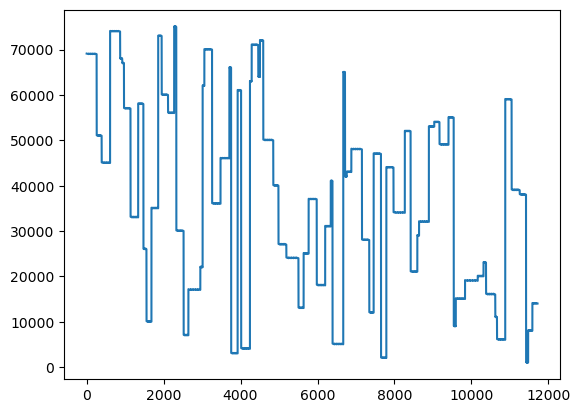

In [13]:
plt.plot(df['Unit'])

## Analysing Data ===============

In [3]:
df = pd.read_csv('Commodies production in Nepal.txt', sep=',')

In [4]:
df.head()

,Year AD,Year BS,Commodity,Production In 1000 dollars,Production – MT
0,2011,2068,"Fruit, fresh nes",277190,794164.0
1,2011,2068,Ginger,146478,216289.0
2,2011,2068,Lentils,81210,206869.0
3,2011,2068,Maize,241848,2067522.0
4,2011,2068,"Mangoes, mangosteens, guavas",105906,176756.0


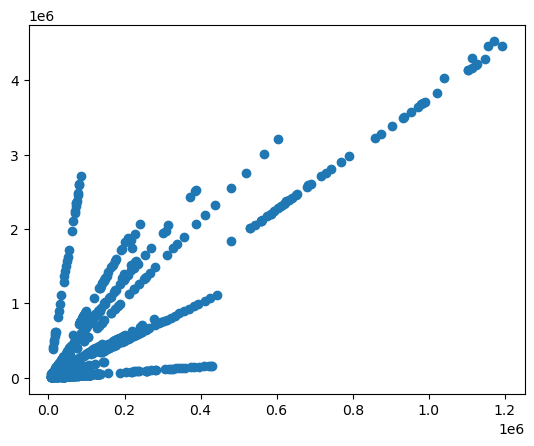

In [5]:
plt.scatter(x=df['Production In 1000 dollars'], y=df['Production – MT'])

In [6]:
maize_filtered_df = df[df['Commodity'].str.contains('Maize')]

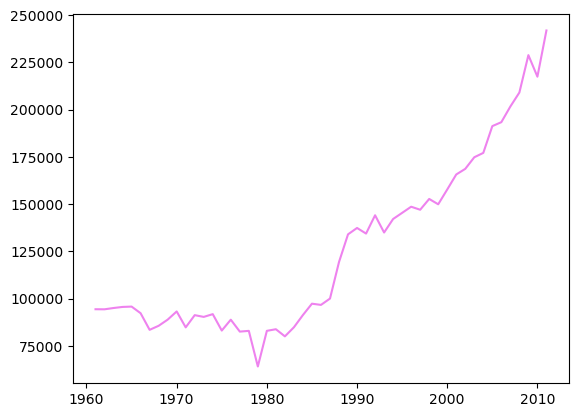

In [7]:
plt.plot(maize_filtered_df['Year AD'], maize_filtered_df['Production In 1000 dollars'], color='violet', label='Maize')

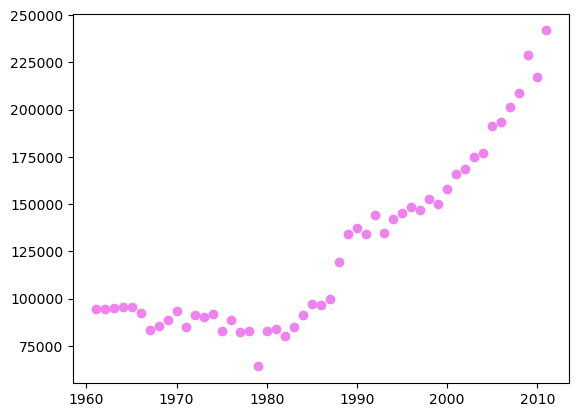

In [8]:
plt.scatter(maize_filtered_df['Year AD'], maize_filtered_df['Production In 1000 dollars'], color='violet', label='Maize')

In [9]:
slope, intercept, r, p, str_err = stats.linregress(maize_filtered_df['Year AD'], maize_filtered_df['Production In 1000 dollars'])

In [28]:
def new_pred(x):
    return slope * x + intercept

### Ploting Linear Line

In [26]:
maize_filtered_df['Year AD']

3       2011
23      2010
43      2009
64      2008
84      2007
104     2006
123     2005
144     2004
164     2003
184     2002
203     2001
223     2000
243     1999
263     1998
283     1997
303     1996
323     1995
343     1994
363     1993
383     1992
403     1991
422     1990
443     1989
463     1988
483     1987
503     1986
523     1985
544     1984
564     1983
584     1982
604     1981
625     1980
645     1979
664     1978
685     1977
705     1976
725     1975
745     1974
764     1973
784     1972
804     1971
824     1970
844     1969
864     1968
884     1967
904     1966
924     1965
944     1964
964     1963
985     1962
1005    1961
Name: Year AD, dtype: int64

In [29]:
mymodel = list(map(new_pred, maize_filtered_df['Year AD']))

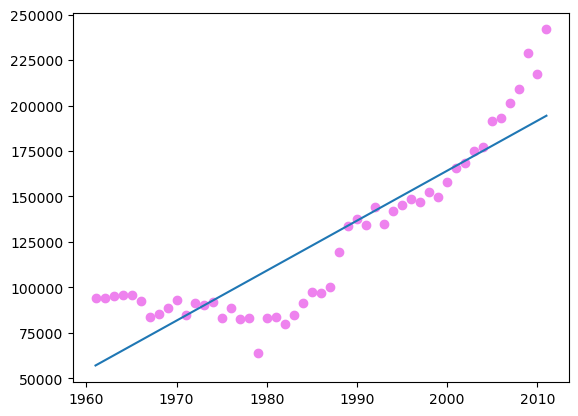

In [30]:
plt.scatter(maize_filtered_df['Year AD'], maize_filtered_df['Production In 1000 dollars'], color='violet', label='Maize')
plt.plot(maize_filtered_df['Year AD'], mymodel)

In [31]:
new_data = [2015, 2020]
new_pred = list(map(new_pred, new_data))

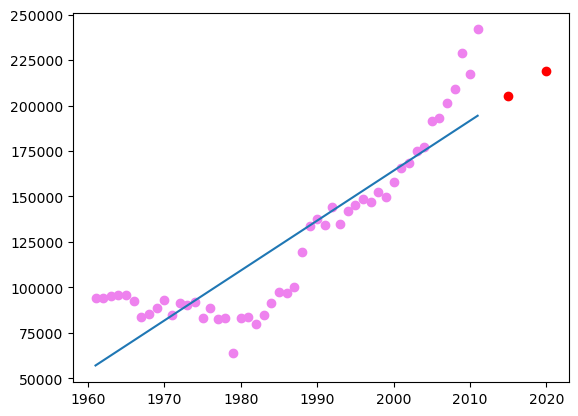

In [34]:
plt.scatter(maize_filtered_df['Year AD'], maize_filtered_df['Production In 1000 dollars'], color='violet', label='Maize')
plt.plot(maize_filtered_df['Year AD'], mymodel)
plt.scatter(new_data, new_pred, color='red')

### ***** END OF FILE ***********************************